### 시계열 다루기
* 타임스탬프는 특정 시점을 말한다. 2015년 6월 4일 오전 7시
* 시간 간격과 기간은 특정 시작점과 종료점 사이의 시간의 길이를 말한다. 예를 들어 2015년이 여기에 해당한다. 기간은 일반적으로 각 간격이 일정하고 서로 겹치지 않는 특별한 경우의 시간 간격을 말한다.
* 시간 델타나 지속시간은 정확한 시간 길이를 말한다. 22.56초의 시간

### 파이썬에서의 날짜와 시간
### 기본 파이썬 날짜와 시간 datatime과 deteutil
날짜와 시간으로 작업하는 파이썬 기본 객체는 내장 모듈인 datetiem에 존재한다. 제 3자 모듈인 dateutil과 함께 datetime모듈을 사용해 날짜와 시간에 여러가지 유용한 기능을 신속하게 수행할 수 있다. 예를 들어 datetiem 타입을 사용해 날짜를 직접 구성할 수 있다.

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
#또는 dateutil 모듈을 이용해 다양한 문자열 형태로부터 날짜를 해석할 수 있다.
from dateutil import parser
date = parser.parse("4th of July, 2015, 21:30")
date

datetime.datetime(2015, 7, 4, 21, 30)

datetime 객체를 갖고 나면 요일을 출력하는 등의 작업을 할 수 있다.

In [5]:
date.strftime('%A')

'Saturday'

마지막 줄에서 날짜를 출력하기 위한 표준 문자열 포맷 코드 중 하나 ('%A')를 사용했는데, 이에 대해서는 파이썬 datetime 문서의 strftime절에서 확인 할 수 있다. 다른 유용한 날짜 유틸리티에 대한 내용은 dateutil 온라인 문서에서 찾을 수 있다.

### 타입이 지정된 시간 배열: Numpy의 datetime64
Numpy는 몇 가지 기본 시계열 타입이 있다. datetime64는 날짜를 64비트 정수로 인코딩해 날짜 배열을 매우 간결하게 표현하게 해준다.

In [6]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [8]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Numpy datetime64 배열은 하나의 타입을 가지고 있기 때문에 이 유형의 연산이 파이썬이 datetime 객체로 직접 작업하는 것 보다 훨씬 더 빨ㄹ ㅣ수행될 수 있다. 특히 배열 크기가 커질수록 더 빠르다. datetime64와 timedelta64객체의 세부사항 중 하나는 기본 시간 단위 기반으로 만들어졌다. datetime64객체는 64비트 정밀도에 제한되기 때문에 인코딩할 수 있는 시간의 범위가 이 기본 단위의 배다. 다시 말해 datetime64는 시간 분해능(time resolution)과 최대 시간 사이의 절충점을 도입한다. 가령 시간 분해는 최대 나노초 또는 600년 이하로만 인코딩 할 수 있다.

In [9]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [10]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [11]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

|Code    | Meaning     | 시간범위(상대적) | 시간범위(절대적)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | 연	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | 월       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | 주	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | 일         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | 시        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | 분      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | 초      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | 밀리초 | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | 마이크로초 | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | 나노초  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | 피코초  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | 펨토초 | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | 아토초  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

현실 세계의 타입인 경우 기본값은 datetime64[ns]이다. 이 값이 적절한 정밀도로 현대 날짜의 유용한 범위를 인코딩할 수 있기 때문이다.

### Pandas에서의 날짜와 시간: 두 세계의 최선
Pandas는 Timestamp객체를 제공하기 위해방금 논의 했던 모든 도구를 기반으로 만들어졌다. 그 객체는 datetime과 dateutil의 사용 편의성과 numpy.datetime64의 효율적인 저장소와 벡터화된 인터페이스를 결합한 것이다. Pandas는 이 Timestamp 객체 그룹으로부터 Series나 DataFrame데이터에 인덱스를 지정하는데 사용할 수 있는 DatetimeIndex를 구성할 수 있다.

In [12]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas 시계열 : 시간으로 인덱싱하기
Pandas 시계열 도구는 실제로 타임 스템프로 데이터를 인덱싱 할때 아주 유용하다. 예를 들어, 시간 인덱스를 가진 데이터의 Series 객체를 구성할 수 있다.

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [17]:
data['2014-07-04':'2015-07-04']
#마찬가지로 슬라이싱처럼 인덱싱 패턴으로 사용할 수 있다

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [18]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas 시계열 데이터 구조
* 타임스템프(time stamp)의 경우 Pandas는 Timestamp 타입을 제공한다. 앞에서 언급했듯이 이것은 근본적으로 파이썬의 기본 datatime의 대체 타입이지만 좀더 효율적인 numpy.datetime64 데이터 타입을 기반으로 한다. 관련 인덱스 구조는 DatetimeIndex다.
* 기간(time period)의 경우, Pandas는 Period 타입을 제공한다. 이것은 numpy.datetime64를 기반으로 고정 주파수 간격을 인코딩한다. 관련 인덱스 구조는 PeriodIndex다.
* 시간 델타 또는 지속 기간의 경우, Pandas는 Timedelta 타입을 제공한다. Timedleta는 파이썬의 기본 datetime, timedelta 타입의 좀 더 효율적인 대체 타입이며 nmpy.timedelta64를 기반으로 한다. 관련 인덱스 구조는 TimedeltaIndex다  

다양한 형식을 분석할 수 있는 pd.to_datetime() 함수를 사용하는 것이 더 일반적이다. 단일 날자를 pd.to_datetime()에 전달하면 Timestamp를 생성하고, 일련의 날자를 전달하면 DatetimeIndex를 생성하는 것이 기본이다.

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

DateimeIndex는 to_period() 함수에 주기 (frequency) 코드를 추가해 PeriodIndex로 전환할 수 있다. 여기서는 일별 주기를 가리키는 'D'를 사용할 것이다.

In [20]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [21]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 정규 시퀀스: pd.date_range()
Pandas는 정규 날짜 시퀀스를 더 편리하게 만들 수있도록 몇 가지 함수를 제공한다. 타임 스템프를 위한 pd.date_range(). 기간을 위한 pd.period_range(), 시간 델타를 위한 pd.timedelta_range()가 여기에 해당한다. 앞에서 본 파이썬의 range()와 Numpy의 np.arange()는 시작점, 종료점 선택적 간격을 시퀸스로 전환한다. 마찬가지로 pd.date_range()는 시작일, 종료일, 선택적 주기 코드를 받아서 정규날짜 시퀀스를 생성한다. 기본적으로 주기는 하루로 설정돼 있다.

In [22]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

날짜 범위를 시작점과 종료점이 아니라 시작점과 기간의 수로 지정할 수도 있다. freq인수를 바꿔서 간격을 조정할 수 있는데, 기본값은 D로 설저오대 있다. 예로 시간 단위의 타임스템프 범위를 만들어보자

In [24]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

이와 매우 유사한 pd.period_range()와 pd.timedelta_range() 함수는 기간이나 타임 델타값의 정규시퀀스를 생성하는데 유용하다. 다음은 월 단위 기간을 예로 든 것이다.

In [25]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

다음은 시간 단위로 증가하는 기간의 시퀸스를 생성한 것이다.

In [30]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### 주기와 오프셋
Pandas 시계열 도구는 주기나 날짜 오프셋 개념을 기반으로 한다. 앞에서 본 D와 H코드 처럼 그러한 코드를 사용해 원하는 주기 간격을 지정할 수 있다.

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | 달력상 일        | ``B``  | 영업일         |
| ``W``  | 주              |        |                      |
| ``M``  | 월말           | ``BM`` | 영업일 기준 월말   |
| ``Q``  | 분기말         | ``BQ`` | 영업일 기준 분기말 |
| ``A``  | 연말            | ``BA`` | 영업일 기준 연말    |
| ``H``  | 시간               | ``BH`` | 영업시간       |
| ``T``  | 분             |        |                      |
| ``S``  | 초             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

월, 분기, 연 단위의 주기는 모두 지정한 기간의 종료 시점을 표시한다. 이 표시에 접미사 S를 추가하면 종료가 아니라 시작 시점으로 표시된다.

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | 월초            ||``BMS``  | 영업일 기준 분기초   |
| ``QS``  | 영업일 기준 월초          ||``BQS``  | 연초 |
| ``AS``  | 분기초             ||``BAS``  | 엽업일 기준 연초    |

이 밖에도 세 글자로 구성된 월 코드를 접미사로 추가해 분기나 년 코드를 표시하는데 사용되는 월을 바꿀 수 있다.

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

같은 방법으로 세글자로 구성된 요일 코드를 추가해서 주를 나누는 분할 점을 수정할 수 있다.

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

이 코드를 숫자와 결합해 다른 주기를 지정할 수도 있다. 예로 2시간 30분 간격의 주기를 지정하려면 시간(H)과 분(T) 코드를 다음과 같이 결합하면 된다.

In [31]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

여기에 사용된 짧은 코드는 모두 pd.tseries.offsets 모듈에서 찾아볼 수 있는 Pandas 시계열 오프셋의 특정 인스턴스를 가리킨다. 예를 들어, 다음 과 같이 영업일 오프셋을 바로 만들 수 있다.

In [35]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

주기와 오프셋의 사용법은 DateOffset 객체 참고
https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html

### 리샘플링, 시프팅, 윈도잉
판다스는 금융 환경을 위해 개발되었기 때문에 몇몇 금융 데이터에 특화된 전용도구를 포함하고 있다. pandas-datareader 패키지는 야후 파이낸스, 구글 파이낸스 등을 포함한 다양한 소스로부터 금융 데이터를 임포트하는데 능숙하다. 다음 예제는 구글의 종가 이력을 적재할 것이다.

In [38]:
!pip install pandas-datareader

  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)


In [43]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2022', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [44]:
goog = goog['Close'] #종가만 사용

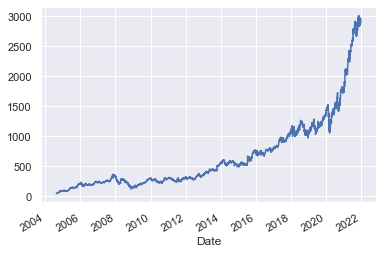

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();

### 리샘플링 및 주기 변경
시계열 데이터에서 일반적으로 필요한 작업은 더 높거나 낮은 주기로 표본을 다시 추출하는 것이다. 이 작업은 resample()매서드를 사용하거나 훨씬 더 간단한 asfreq()메서드를 사용해 수행할 수 있다. 이 두 메서드의 주요 차이점은 resample()은 기본적으로 데이터를 집계 하지만 asfreq()는 기본적으로 데이터를 선택한다는 것이다.

구글 종가를 살펴보면서 데이터를 다운 샘플링(down-sampling)할 때 이 두 개의 메서드가 반환하는 값을 비교해 보자. 여기서는 영업일 기준 연말 데이터를 리샘플링 할 것이다.

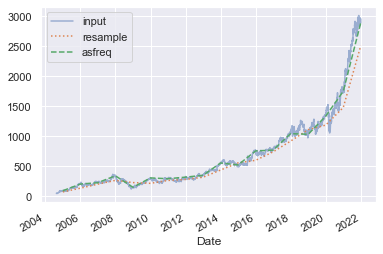

In [47]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

차이점은 각 점에서 resample는 전년도 평균을 보여주지만 asfreq는 연말 주가를 보여준다는 것이다.  
업샘플링(upsampling)의 경우 resample()과 asfreq()가 대체로 유사하지만, resample 매서드에서 더 많은 옵션을 사용할 수 있다. 이 경우에 두 메서드의 기본값은 업샘플링된 점을 빈 값으로 두는 것이다. 즉 NA 값으로 채운다. 앞에서 본 pd.fillna() 함수와 마찬가지로 asfreq()는 값을 어떤 방식으로 채울 것인지를 지정하기 위해 method 인수를 받는다. 여기서는 영업일 데이터를 일변 주기로(주말 포함) 리샘플링 할 것이다.

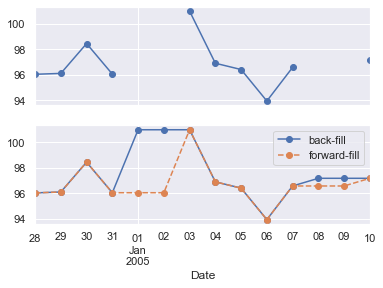

In [50]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[90:100]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

위 그림은 원본이고 아래는 틈을 채우기 위해 순방향 채우기와 역방향 채우기의 차이를 본다.

### 시간 이동(Time-shift)
또 다른 일반적인 시계열은 시간에 따라 데이터를 이동 시킨다. Pandas에는 이를 계산하기 위해 두 가지 밀접하게 관련된 매서드 shift()와 tshft()가 있다. 요컨대 이 두 메서드 사이의 차이는 shfit()는 데이터를 이동시키는 반면, tshift()는 인덱스를 이동시킨다는데 있다.  

다음 코드에서는 900일 단위로 shfit(), tshift()를 수행할 것이다.

C:\Users\dhjun\AppData\Local\Temp/ipykernel_10596/1419339079.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


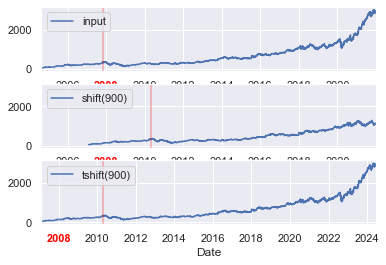

In [51]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

여기서 shift(900)은 데이터를 900일 이동시켜서 그래프 끝의 일부를 밀어내고 그 반대쪽은 NA값으로 두는 반면, tshift(900)은 인덱스 값을 900일 만큼 이동시킨다. 이러한 유형의 이동 작업은 시간상의 차이를 계산할 때 일반적으로 사용된다. 다음 예제는 이동된 값을 사용해 데이터 세트의 기간 동안 구글 주가의 연간 투자 대비 효과를 계산한 것이다.

C:\Users\dhjun\AppData\Local\Temp/ipykernel_10596/2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


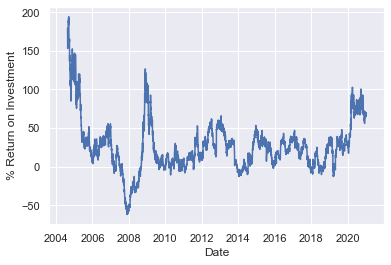

In [52]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

구글에 투자하기 좋은 시점은 IPO바로 다음, 2009년 리먼브라더스 2020 코로나19일때이다.

### 롤링 윈도우(Rolling windows)
롤링 통계는 시리즈와 데이터프레임 객체의 rolling()속성을 통해 수행할 수 있는데 이 속성은 groubpy 연산에서 본것과 유사한 뷰를 반환한다. 롤링 뷰에서는 여러 집계 연산을 기본으로 사용할 수 있다. 예를 들어 다음은 구글 주가의 1년 중심롤링 평균과 표준편차를 구한 것이다.

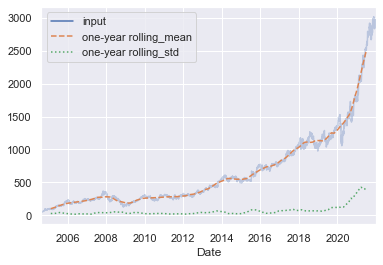

In [53]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [77]:
data = pd.read_csv('./data/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [78]:
data.pop('Fremont Bridge Total')

Date
2019-11-01 00:00:00     12.0
2019-11-01 01:00:00      7.0
2019-11-01 02:00:00      1.0
2019-11-01 03:00:00      6.0
2019-11-01 04:00:00      6.0
                       ...  
2022-03-31 19:00:00    136.0
2022-03-31 20:00:00     94.0
2022-03-31 21:00:00     48.0
2022-03-31 22:00:00     33.0
2022-03-31 23:00:00     24.0
Name: Fremont Bridge Total, Length: 149438, dtype: float64

In [79]:
data.columns

Index(['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], dtype='object')

In [80]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [81]:
data.dropna().describe()

,West,East,Total
count,149414.000000,149414.000000,149414.000000
mean,49.708488,59.903724,109.612212
std,64.325026,86.811525,139.769975
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,27.000000,30.000000,59.000000
75%,67.000000,74.000000,144.000000
max,698.000000,850.000000,1097.000000


### 데이터 시각화하기

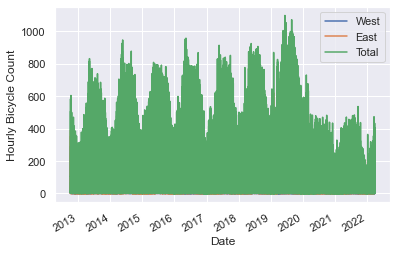

In [82]:
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

149414개의 시간별 분포는 너무 촘촘해서 이해하기 어렵다. 좀더 널널한 그리드에 데이터를 리샘플링하면 이해하기 쉬울 것이다 주단위로 해보자

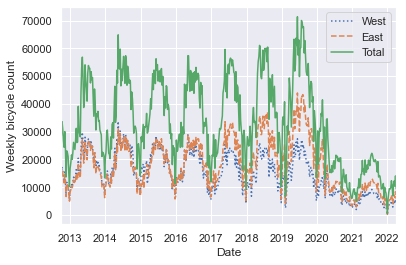

In [83]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

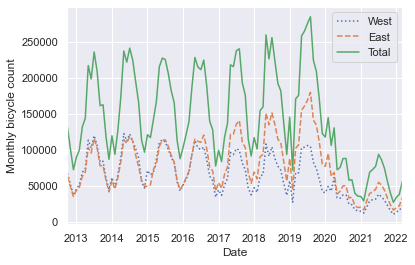

In [84]:
weekly = data.resample('M').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Monthly bicycle count');

사람들은 겨울보다 여름에 자전거를 많이 타며 특정 계절에는 자전거 사용 횟수가 주마다 달라진다. 데이터를 집계하는데 도움이 되는 다른 방법은 pd.rolling)_mean() 함수를 활용하는 롤링 평균을 사용하는 것이다. 이때 데이터의 30일 롤링 평균을 구해 해당 기간의 데이터가 중시멩 오게 할 것이다.

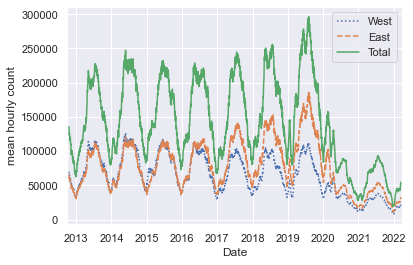

In [85]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

결과가 들쑥날쑥한 것은 기간이 잘렸기 때문이다. 가우스 윈도우 같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현할 수 있다.

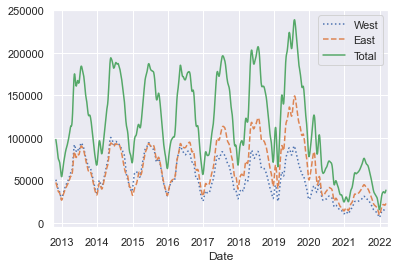

In [86]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### 데이터 파헤쳐보기
평활된 데이터 뷰는 데이터의 일반적인 추세를 살펴보는 데는 유용하지만 흥미로운 구조를 보기는 어렵다. 예를 들어 하루 시간대를 기준으로 한 함수로 평균 통행량을 보고 싶다고 하자. 이 작업은 185쪽 집계와 분류에서 소개한 GroupBy 기능을 사용해 수행할 수 있다.

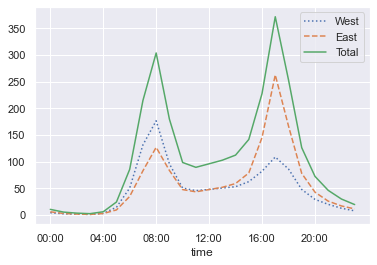

In [87]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

시간대별로 보면 아침 8시와 저녁 5시 무렵에 정점을 이루는 강한 양봉분포를 보인다. 다리를 건너는 출퇴근 통행량인 것으로 보인다.서쩍 보도 시애틀 도심으로 이동할때 주로 사용 교통량이 정점을 이루고 동쪽 보도 도심에서 벗어날때(퇴근할때) 정점을 찍는다. 요일에 따라 변하는 것은 간단한 groupby로 답을 구할 수 있다.

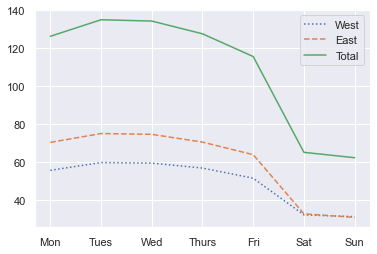

In [88]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

여기서 주중과 주말 총합 사이에 차이가 뚜렷하게 드러난다. 월요일 부터 금요일까지의 평균 통행량이 토요일과 일요일의 평균 통행량의 두배이다. 이 사실을 염두에 두고 복합적인 gorupby를 사용해 주중 주말의 시간대별 추이를 살펴보자. 먼저 데이터를 주말을 표시하는 플래그와 시간대별로 분류하자.

In [89]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

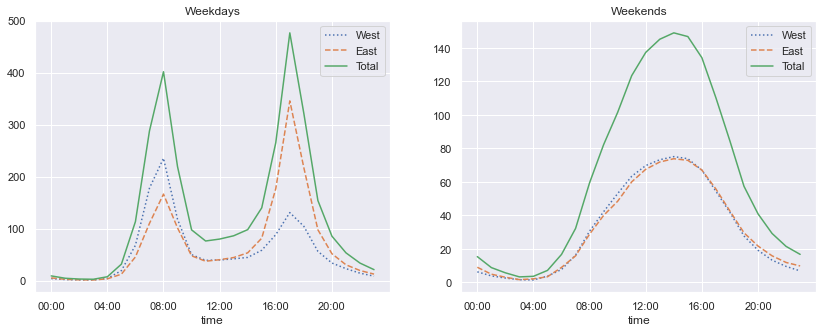

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

주중에는 양봉 형태의 출퇴근 패턴을 보이고 주말에는 단봉의 여가를 즐기는 패턴을 보인다. 이 데이터를 더 자세히 분석해 사람들의 출퇴근 패턴에 영향을 미치는 날씨와 온도, 연중 시기 등 기타 요인의 효과를 알아보면 흥미로울 것이다.

### 고성능 Pandas: eval()과 query()
파이데이터 스택의 능력은 Numpy와 Pandas의가 직관적인 구문을 통해 기본 연산을 C로 풀어내는 능력을 기반으로 한다. 예로 Numpy의 벡터화/브로드캐스팅된 연산과 Pandas의 그룹화 유형의 연산을 들 수 있다. 이 추상화가 일반적인 경우에 대체로 효율적인 효과적이기는 하지만, 임시 중간 객체 생성에 의준하는 경우가 종종 있어 오버헤드를 일으킬 수 있다.

### query()와 eval()의 등장 배경 : 복합 표현식
Numpy와 Pandas가 속도가 빠른 벡터화된 연산을 지원하는 것은 앞에서 봤다. 예를 들어 두 배열의 요소를 더할 때의 코드는 다음과 같다.

In [92]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x+y

2.2 ms ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


이렇게 연산하는 것이 파이썬 루프타 컴프리헨션으로 더하는 것 보다 훨씬 빠르다.

In [93]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

198 ms ± 28.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


그러나 추상화는 복합 표현식을 계산할 때는 효율성이 떨어질 수 있다. 예를 들어 다음 표현식을 생각해보자

In [94]:
mask = (x>0.5)&(y<0.5)

In [96]:
tmp1 = (x>0.5)
tmp2 = (y<0.5)
mask = tmp1 & tmp2

모든 중간 단계가 명시적으로 메모리에 할당된다. 만약 x,y의 규모가 너무 크면 오버헤드가 발생할 수 있다. numexpr라이브러리를 사용하면 중간 배열을 할당하지 않고도 요소별로 이러한 유형의 복합 표현식을 계산할 수 있다. Numexper 문서에서 더 자세한 내용을 확인할 수 있다.

In [97]:
import numexpr
mask_numexpr = numexpr.evaluate('(x>0.5)&(y<0.5)')
np.allclose(mask, mask_numexpr)

True

이 방식의 장점은 Numexpr가 전체 크기의 임시 배열을 사용하지 않고서 표현식을 평가한다는 점이다. 그래서 특히 큰 배열의 경우에는 이것이 NumPy보다 훨씬더 효율적이다. 이어서 다룰 Pandas eval()과 query()도구는 개념적으로 유사하며 Numexpr패키지에 의존한다.

### 효율적인 연산을 위한 pandas.eval()
판다스의 eval()함수는 데이터프레임을 사용하는 연산을 효율적으로 계산하기 위해 문자열 표현식을 사용한다.

In [98]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows,ncols)) for i in range(4))

In [99]:
%timeit df1+df2+df3+df4

34.9 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


표현식을 문자열로 구성함으로 pd.eval을 통해 다음과 같은 계산 결과를 얻을 수 있다.

In [100]:
%timeit pd.eval('df1+df2+df3+df4')

15 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [101]:
np.allclose(df1+df2+df3+df4, pd.eval('df1+df2+df3+df4'))

True

두 표현식은 동일하면서 50%더 빠르고 메모리도 적게 사용한다.

### pd.eval()이 지원하는 연산

In [102]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [103]:
#모든 산술 연산자를 지원한다.
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [104]:
#모든 비교 연산자를 지원한다.
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [105]:
#모든 비트단위 연산자를 지원한다.
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [106]:
#부울 표현식에서 리터럴 and와 or사용을 지원한다.
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [108]:
#객체 속성과 인덱스 pd.eval()은 obj.attr 구문을 통해 객체 속성에 접근하는 것을 지원하고
# obj[index] 구문을 통해 인덱스에 접근하는 것을 지원한다.
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

기타연산 함수 호출, 조건문, 루프를 포함해 그 밖의 복잡한 생성과 같은 다른 연산은 현재 pd.eval()에 구현돼 있지 않다. 이처럼 더 복잡한 유형의 표현식을 실행하고 싶을 때는 Numexpr라이브러리를 사용하면 된다.

### 열 단위의 연산을 위한 DataFrame.eval()
Pandas의 최상위 레벨에 pd.eval()함수가 있듯이 DataFrame에도 비슷한 방식으로 동작하는 eval() 매서드가 있다. eval() 메서드의 이점은 열을 이름으로 부를 수 있다는 것이다.

In [109]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [110]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [111]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

eval을 사용하면 표현식을 훨씬더 간결하게 평가할수 있다. 평가된 표현식에서는 열 이름을 변수로 취급하며 바라는 것을 결과로 얻게 된다는 점이다.

### DataFrame.eval()에서의 할당
방금 이야기한 옵션과 더불어 DataFrame.eval()을 사용해 열을 할당할 수 있다.

In [112]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


df.eval()을 사용할 수 있다. 같은 방식으로 기존 열이든 수정할 수 있다.

In [113]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


### DataFrame.eval()의 지역변수
DataFrame.eval() 매서드는 지역 파이썬 변수와 함께 작업할 수 있도록 추가적인 구문을 지원한다.

In [114]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

@ 기호는 열 이름이 아닌 변수 이름을 표시해서 두 개의 네임스페이스(namesapce) 즉 열의 네임스페이스와 파이썬 객체의 네임 스페이스를 포함하는 표현식을 효율적으로 평가할 수 있게 해준다. @ 기호는 pandas.eval함수가 아닌 DataFrame.eval() 메서드에서만 지원되는데 pandas.eval()함수는 하나의 파이썬 네임스페이스에만 접근할 수 있기 때문이다.
* 네임스페이스 : 개체를 구분할 수 있는 범위를 나타내는 말로 일반적으로 하나의 이름 공간에서는 하나의 이름이 단 하나의 개체만을 가리키게 된다.

### DataFrame.query() 매서드
데이터프레임에는 평가된 문자열을 기반으로 하는 다른 매서드로 query()가 있다.

In [115]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

DataFrame.eval()을 살펴볼 때 사용했던 예제에서와 마찬가지로 이것은 DataFrame의 열을 포함하는 표현식이다. 그렇지만 그것을 DataFrame.eval()구문을 사용해 표현할 수는 없다. 대신 이러한 유형의 필터링 연산에는 query()매서드를 사용할 수 있다.

In [116]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

마스킹 표현식에 비해 계산이 더효율적인 것 외에도 이방법이 훨씬더 읽고 이해하기 쉽다. query()메서드도 지역 변수를 표시하기 위해 @ 플래그를 받는다.

In [117]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

### 성능: 이 함수를 사용해야 하는 경우
계산 시간과 메모리 사용의 두 가지 사항을 고려해야 한다. 메모리 사용은 가장 예측하기 쉬운 부분이다. 넘파이나 데이터프레임은을 포함하는 모든 복합 표현식은 암묵적으로 임시 배열을 생헝한다.

In [119]:
x = df[(df.A<0.5) & (df.B<0.5)]
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

임시 DataFrame의 크기가 사용 가능한 시스템 메모리(일반적으로 수 기가바이트)에 비해 상당히 크다면 eval()이나 query()표현식을 사용하는 것이 좋다.

In [120]:
df.values.nbytes

32000

성능 측면에서 볼 때 시스템 메모리를 넘어서지 않는다면 eval()이 더 빠를 수 있다. 문제는 임시 DataFrame을 시스템의 CPu 캐시 규모와 비교하는 법이 있다.